# Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scikit_posthocs import posthoc_dunn
from scipy import stats
import seaborn as sns

sns.set_theme(rc={'figure.dpi': 300})

# Load data

In [2]:
df = pd.read_csv('../data/MEB_predictions.csv')
df

,label,image,gender,race,predictions
0,0.013640,kuma-kum-GKbPbR0ZAT4-unsplash.jpg,female,caucasian,0.644531
1,0.000000,pexels-cottonbro-5529905.jpg,male,asian,0.593750
2,0.057971,pexels-himesh-mehta-3059930.jpg,female,indian,0.328125
3,0.103060,pexels-kaniseeyapose-2751061.jpg,male,asian,0.710938
4,0.115942,imad-clicks-2_qmEnz7bQ4-unsplash.jpg,female,mideastern,0.523438
...,...,...,...,...,...
2381,0.927536,pexels-pixabay-247322.jpg,female,caucasian,0.785156
2382,0.971014,women-5930352_1920.jpg,female,asian,0.558594
2383,0.953301,francesca-zama-1fhl_kmbfAE-unsplash.jpg,female,hispanic,0.605469
2384,1.000000,sofia--LNdco1UgNY-unsplash.jpg,female,caucasian,0.851562


In [8]:
df['error'] = df['predictions'] - df['label']


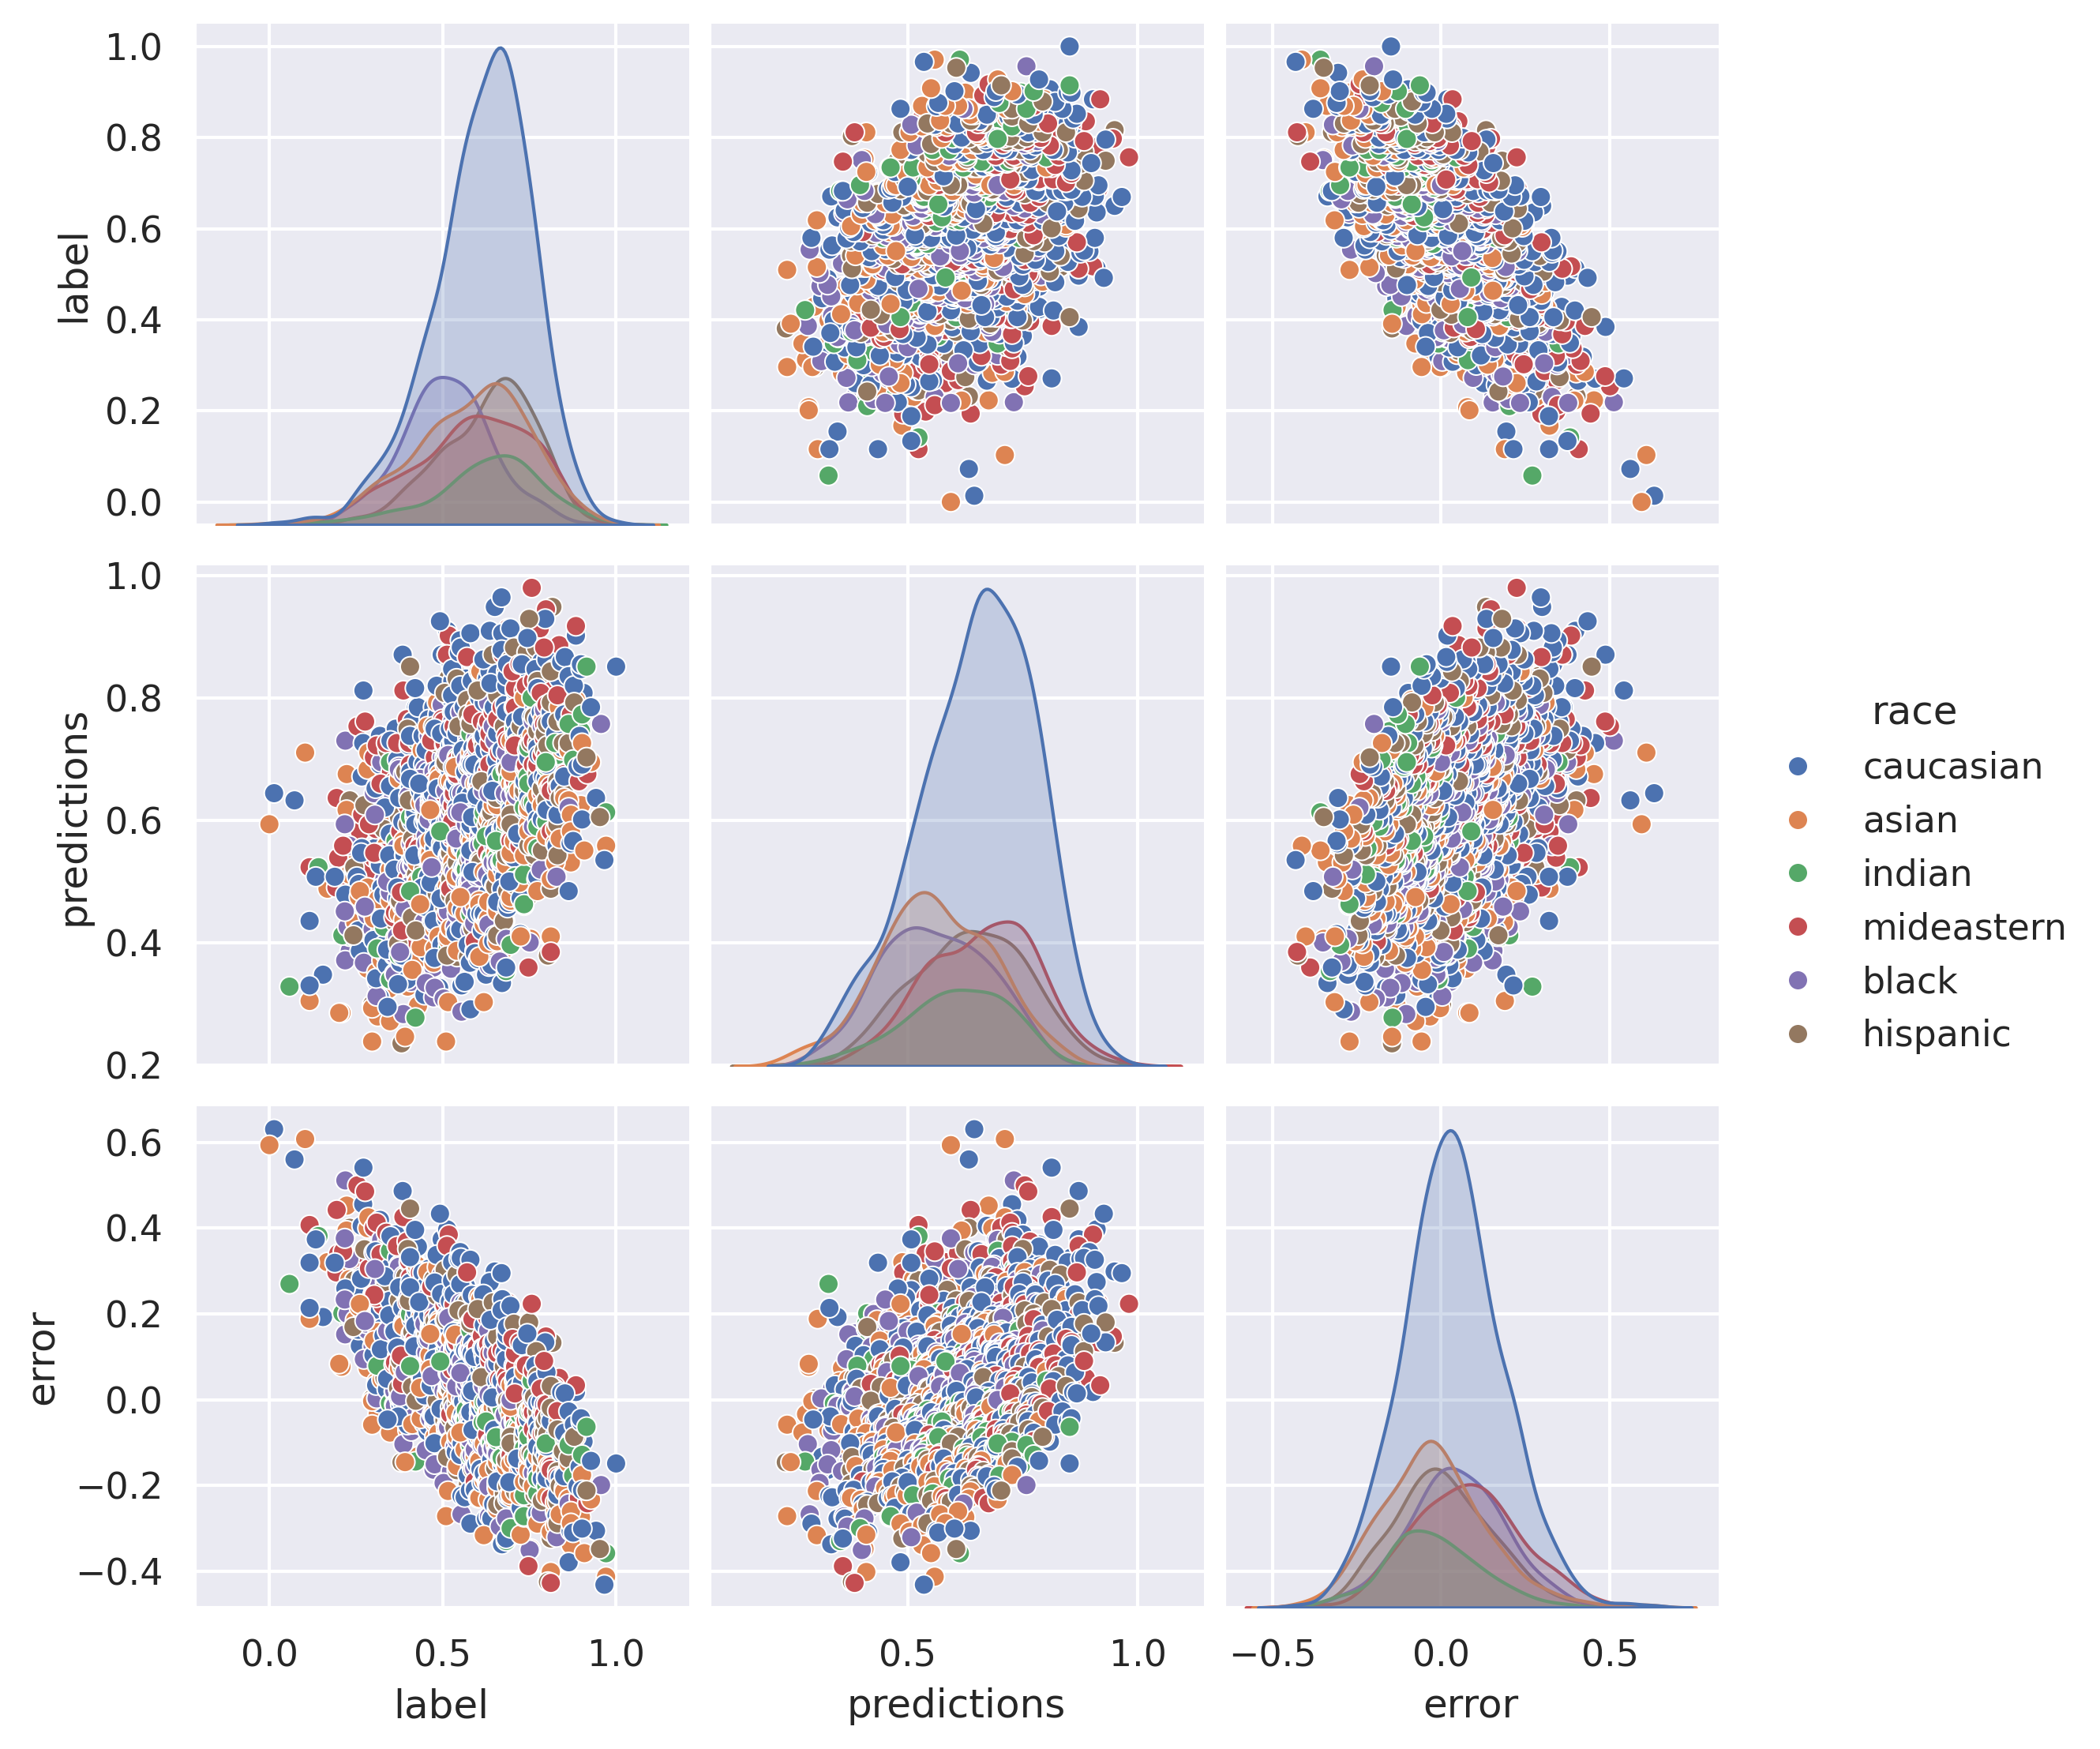

In [9]:
sns.pairplot(df, hue='race');

In [10]:
df['squarerror'] = df['error'] ** 2
df.squarerror.describe()

count    2.386000e+03
mean     2.354609e-02
std      3.592448e-02
min      4.615135e-09
25%      2.015085e-03
50%      9.603730e-03
75%      3.042718e-02
max      3.980235e-01
Name: squarerror, dtype: float64

In [11]:
df.groupby('race').describe().T

race                    asian         black   caucasian      hispanic  \
label       count  355.000000  2.980000e+02  984.000000  2.950000e+02   
            mean     0.581844  5.144658e-01    0.614377  6.307410e-01   
            std      0.164540  1.287876e-01    0.141561  1.348358e-01   
            min      0.000000  2.173913e-01    0.013640  2.318841e-01   
            25%      0.474976  4.374947e-01    0.530021  5.326723e-01   
            50%      0.605475  5.152979e-01    0.631240  6.511628e-01   
            75%      0.695652  5.925926e-01    0.712994  7.286390e-01   
            max      0.971014  9.565217e-01    1.000000  9.533011e-01   
predictions count  355.000000  2.980000e+02  984.000000  2.950000e+02   
            mean     0.560778  5.589936e-01    0.648979  6.335309e-01   
            std      0.122832  1.154421e-01    0.125607  1.232402e-01   
            min      0.238281  2.832031e-01    0.291016  2.353516e-01   
            25%      0.474609  4.731445e-01    0.565430  5.449219e-01   
            50%      0.558594  5.585938e-01    0.660156  6.367188e-01   
            75%      0.656250  6.445312e-01    0.742188  7.265625e-01   
            max      0.843750  8.476562e-01    0.964844  9.492188e-01   
error       count  355.000000  2.980000e+02  984.000000  2.950000e+02   
            mean    -0.021067  4.452771e-02    0.034602  2.789893e-03   
            std      0.157815  1.424463e-01    0.146562  1.451958e-01   
            min     -0.412421 -3.501815e-01   -0.431027 -4.244064e-01   
            25%     -0.130130 -4.612253e-02   -0.062063 -9.466586e-02   
            50%     -0.030922  4.108103e-02    0.029812 -2.107106e-03   
            75%      0.072051  1.378143e-01    0.124938  9.540072e-02   
            max      0.607878  5.114671e-01    0.630891  4.457654e-01   
squarerror  count  355.000000  2.980000e+02  984.000000  2.950000e+02   
            mean     0.025279  2.220557e-02    0.022656  2.101813e-02   
            std      0.041381  3.172826e-02    0.035540  2.969407e-02   
            min      0.000004  4.615135e-09    0.000002  6.790151e-07   
            25%      0.001969  1.851991e-03    0.001960  1.897618e-03   
            50%      0.009491  1.047825e-02    0.008795  9.073205e-03   
            75%      0.033565  2.863433e-02    0.029608  2.997051e-02   
            max      0.369516  2.615986e-01    0.398023  1.987068e-01   

race                     indian  mideastern  
label       count  1.550000e+02  299.000000  
            mean   6.260841e-01    0.587079  
            std    1.591435e-01    0.164407  
            min    5.797101e-02    0.115942  
            25%    5.506450e-01    0.480627  
            50%    6.534914e-01    0.594792  
            75%    7.278583e-01    0.713097  
            max    9.710145e-01    0.916996  
predictions count  1.550000e+02  299.000000  
            mean   6.039441e-01    0.661737  
            std    1.136152e-01    0.117905  
            min    2.773438e-01    0.359375  
            25%    5.312500e-01    0.572266  
            50%    6.132812e-01    0.664062  
            75%    6.933594e-01    0.751953  
            max    8.515625e-01    0.980469  
error       count  1.550000e+02  299.000000  
            mean  -2.214008e-02    0.074658  
            std    1.375993e-01    0.157981  
            min   -3.577332e-01   -0.426829  
            25%   -1.148505e-01   -0.036799  
            50%   -3.191346e-02    0.074317  
            75%    6.765286e-02    0.180706  
            max    3.817306e-01    0.499938  
squarerror  count  1.550000e+02  299.000000  
            mean   1.930159e-02    0.030448  
            std    2.704680e-02    0.042489  
            min    6.790151e-07    0.000010  
            25%    2.492842e-03    0.002995  
            50%    9.750469e-03    0.014472  
            75%    2.341415e-02    0.038216  
            max    1.457182e-01    0.249938

# Error Analysis

In [12]:
for race in df['race'].unique():
    print(f'Shapiro test for {race}')
    print('error')
    print(stats.shapiro(df[df['race'] == race]['error']))
    print()

Shapiro test for caucasian
error
ShapiroResult(statistic=0.9966211597275275, pvalue=0.03317537094492674)

Shapiro test for asian
error
ShapiroResult(statistic=0.9815384882131093, pvalue=0.0001624382693909668)

Shapiro test for indian
error
ShapiroResult(statistic=0.9901886114935625, pvalue=0.357691889968887)

Shapiro test for mideastern
error
ShapiroResult(statistic=0.9966182131623768, pvalue=0.7812313828455226)

Shapiro test for black
error
ShapiroResult(statistic=0.9981574994337089, pvalue=0.9863861327387378)

Shapiro test for hispanic
error
ShapiroResult(statistic=0.9961683766049463, pvalue=0.6953019380553335)



In [13]:
stats.kruskal(df.loc[df.race == 'caucasian', 'error'], df.loc[df.race == 'asian', 'error'], df.loc[df.race == 'indian', 'error'], df.loc[df.race == 'mideastern', 'error'], df.loc[df.race == 'black', 'error'], df.loc[df.race == 'hispanic', 'error'])

KruskalResult(statistic=100.81865891461176, pvalue=3.5521747231619654e-20)

In [14]:
def f_statistic(*samples, axis=0):
    return stats.f_oneway(*samples, axis=axis).statistic

stats.permutation_test([df.loc[df.race == race, 'error'] for race in df.race.unique()], statistic=f_statistic)

PermutationTestResult(statistic=19.806949756209914, pvalue=0.0002, null_distribution=array([0.94410701, 0.66631544, 0.26200242, ..., 0.47934074, 0.39363712,
       1.05509684]))

<Axes: >

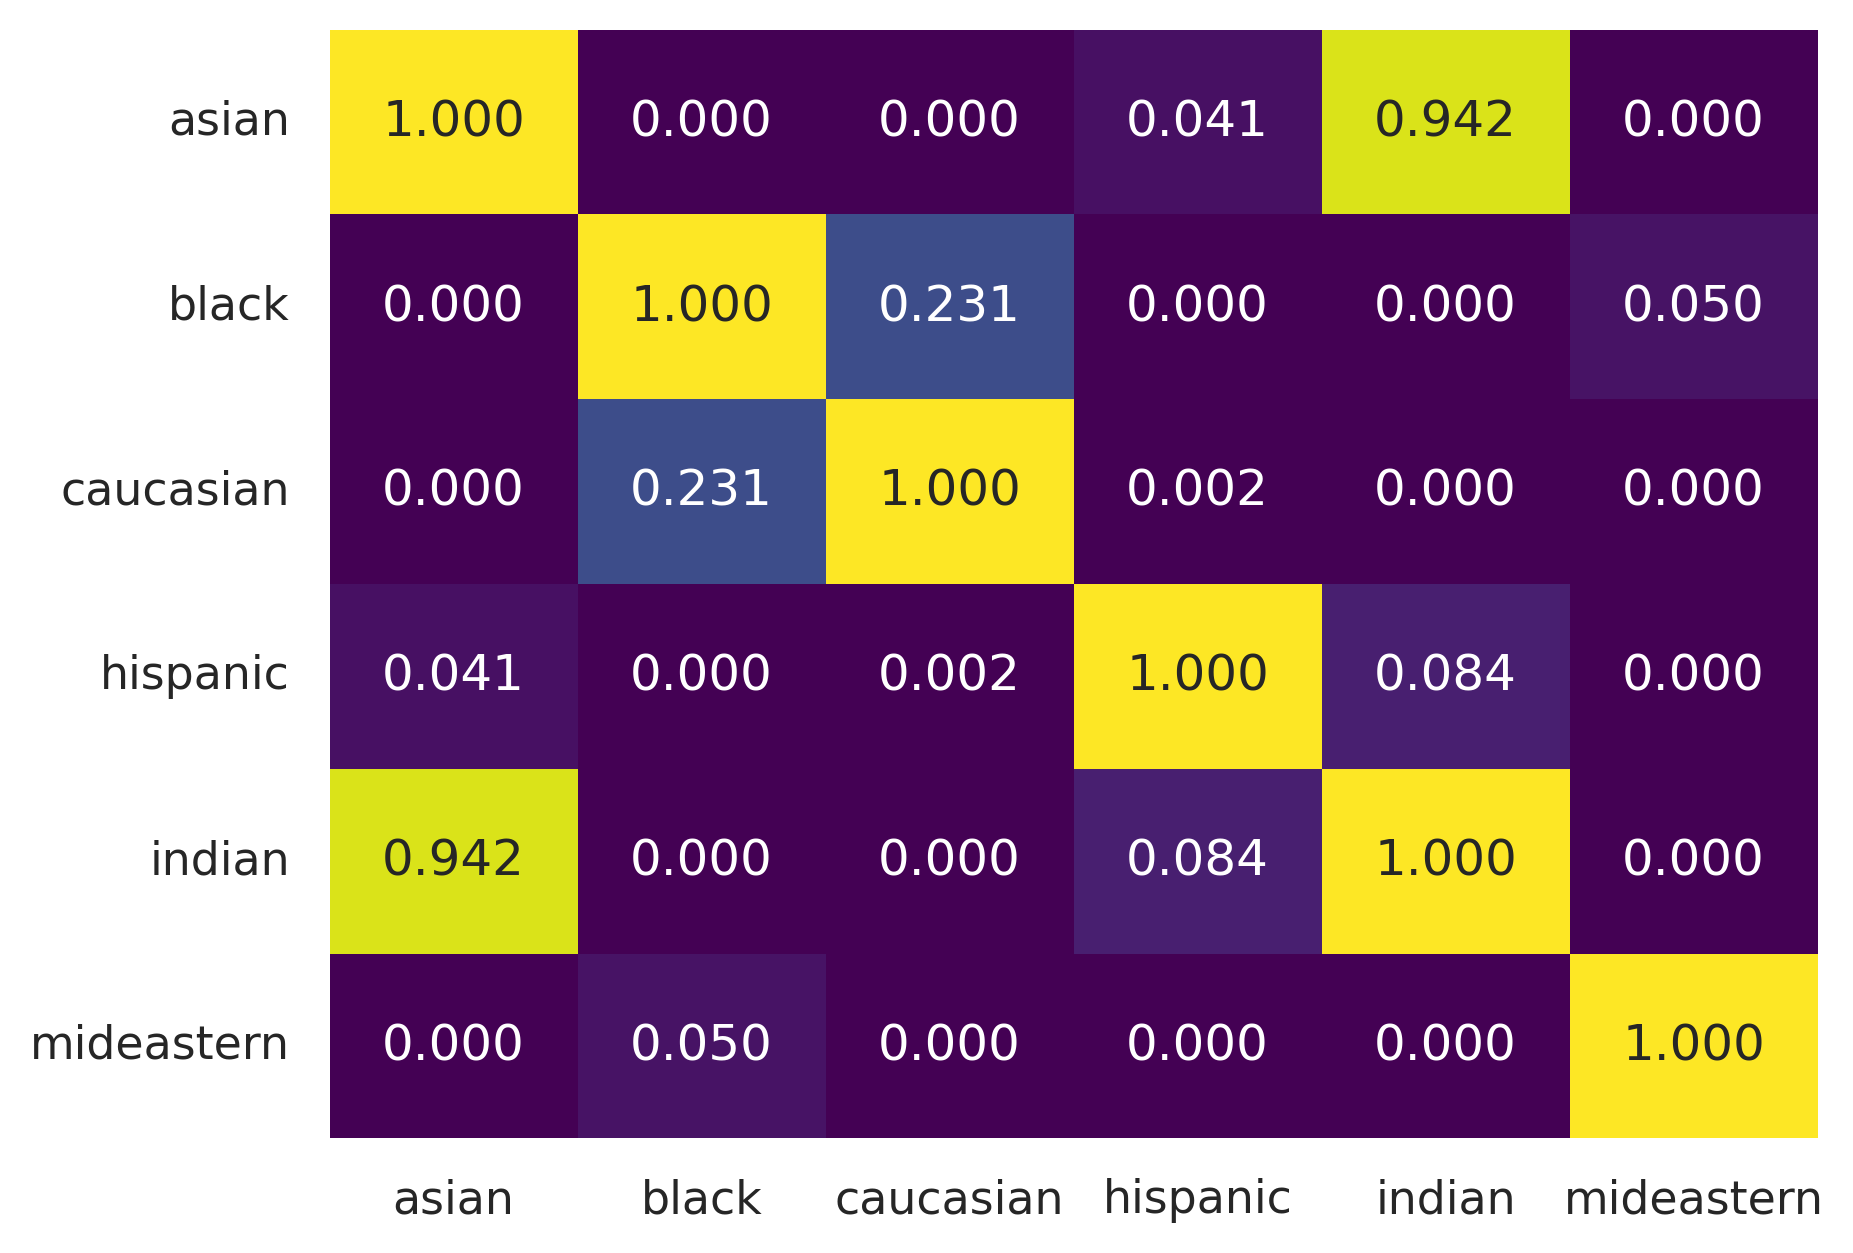

In [15]:
p_values = posthoc_dunn(df, 'error', 'race', p_adjust='fdr_bh')
sns.heatmap(p_values, annot=True, fmt='.3f', cmap='viridis', cbar=False)

<Axes: xlabel='error', ylabel='race'>

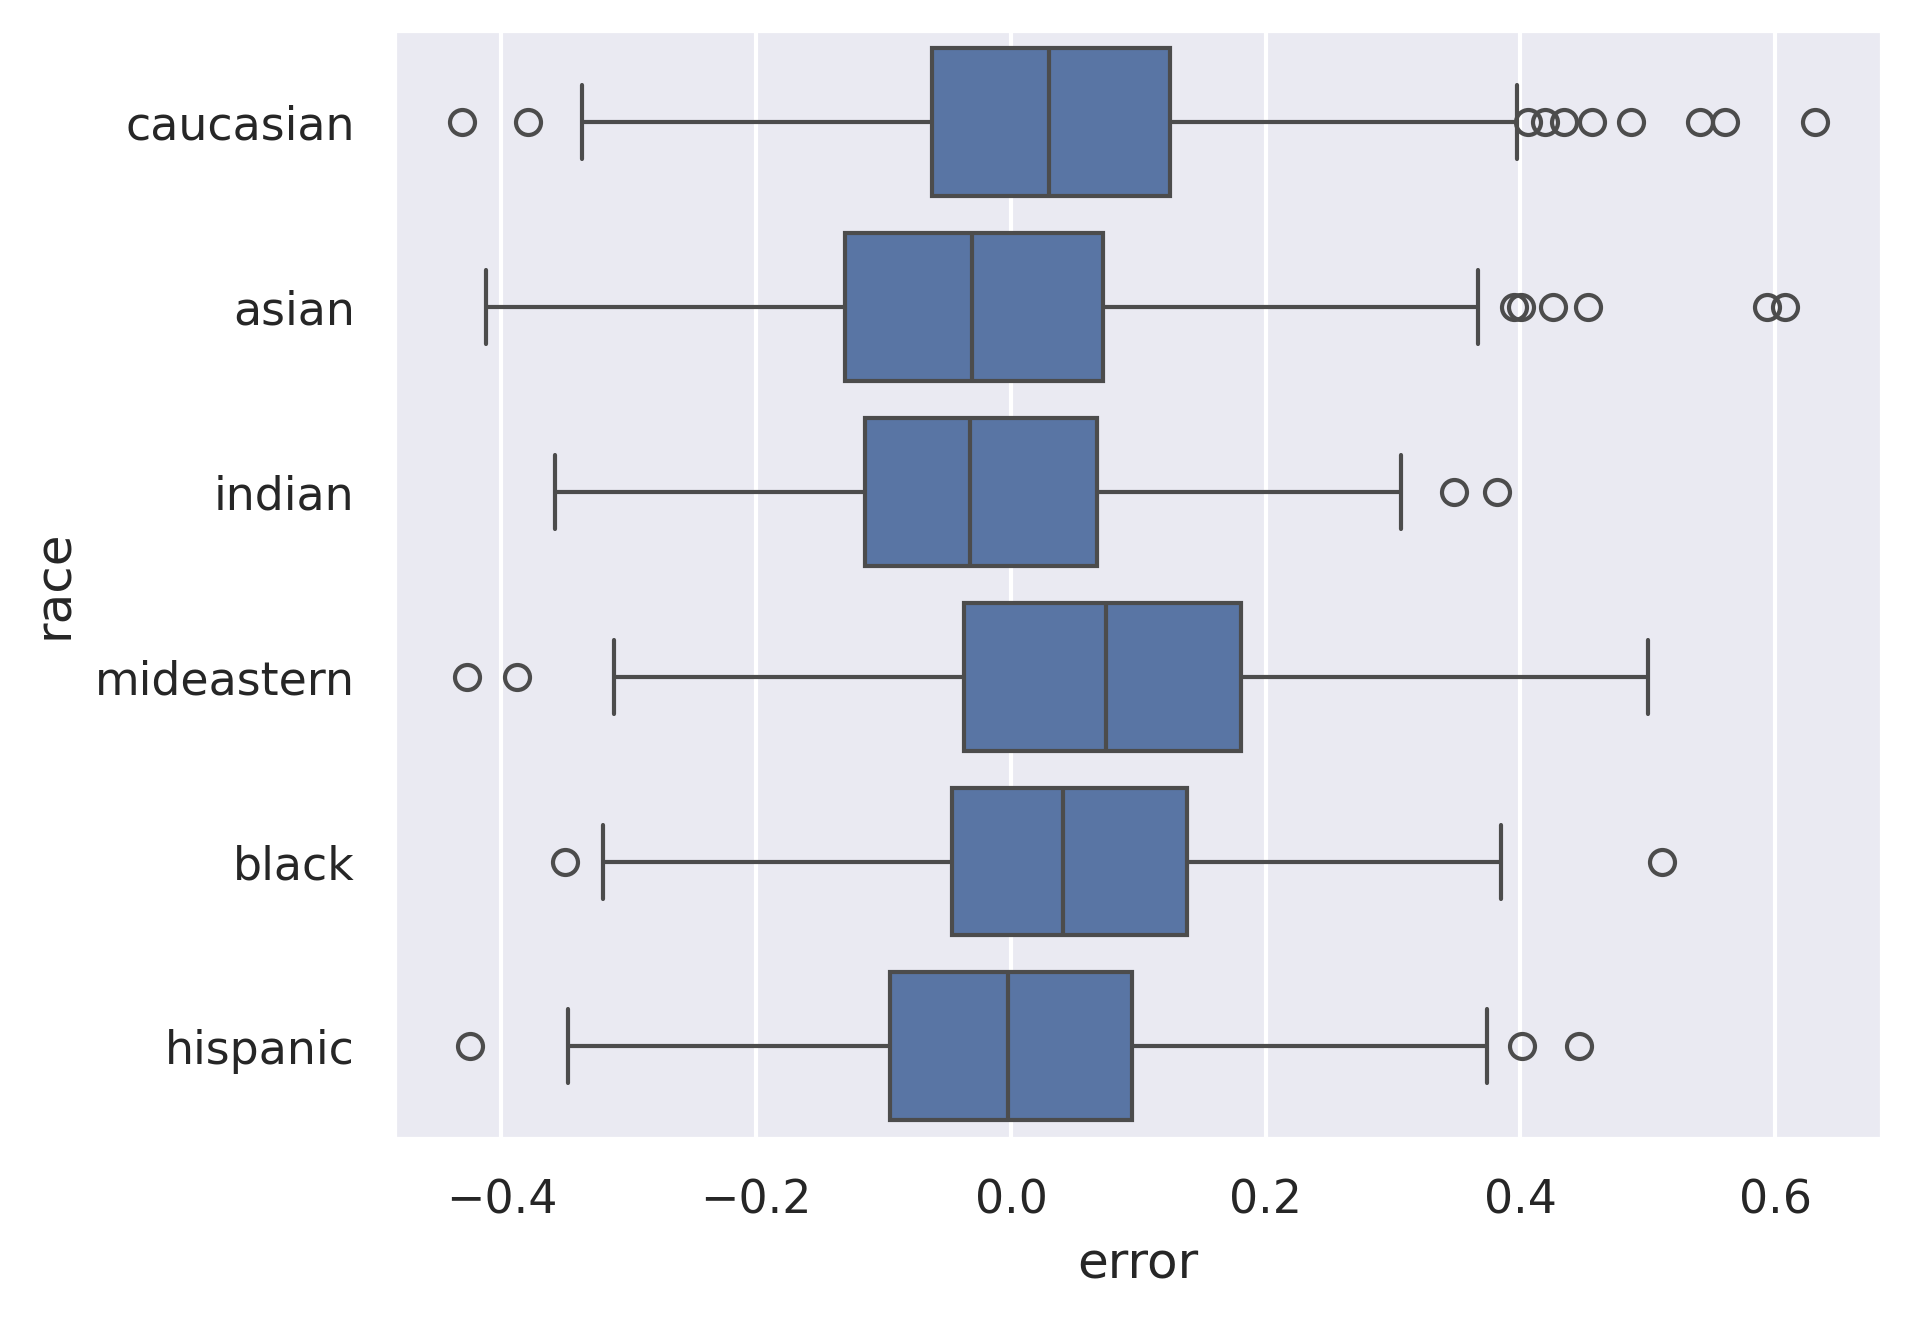

In [16]:
sns.boxplot(df, x='error', y='race')

# Prediction Analysis

In [17]:
df['predictions'].describe()

count    2386.000000
mean        0.621381
std         0.128194
min         0.235352
25%         0.531250
50%         0.628906
75%         0.718750
max         0.980469
Name: predictions, dtype: float64

In [18]:
for race in df['race'].unique():
    print(f'Shapiro test for {race}')
    print('predictions')
    print(stats.shapiro(df[df['race'] == race]['predictions']))
    print()

Shapiro test for caucasian
predictions
ShapiroResult(statistic=0.9863585976557517, pvalue=6.122443968037154e-08)

Shapiro test for asian
predictions
ShapiroResult(statistic=0.9942922676610053, pvalue=0.20697070172539445)

Shapiro test for indian
predictions
ShapiroResult(statistic=0.9822128312362686, pvalue=0.04310910265372549)

Shapiro test for mideastern
predictions
ShapiroResult(statistic=0.9929419713575898, pvalue=0.170942190692717)

Shapiro test for black
predictions
ShapiroResult(statistic=0.9903090600291174, pvalue=0.04577699951850191)

Shapiro test for hispanic
predictions
ShapiroResult(statistic=0.9941534577532886, pvalue=0.31555704012356245)



In [19]:
stats.kruskal(df.loc[df.race == 'caucasian', 'predictions'], df.loc[df.race == 'asian', 'predictions'], df.loc[df.race == 'indian', 'predictions'], df.loc[df.race == 'mideastern', 'predictions'], df.loc[df.race == 'black', 'predictions'], df.loc[df.race == 'hispanic', 'predictions'])

KruskalResult(statistic=228.79021264882076, pvalue=1.9430932795884247e-47)

In [20]:
def f_statistic(*samples, axis=0):
    return stats.f_oneway(*samples, axis=axis).statistic

stats.permutation_test([df.loc[df.race == race, 'predictions'] for race in df.race.unique()], statistic=f_statistic)

PermutationTestResult(statistic=50.9668986113479, pvalue=0.0002, null_distribution=array([0.29504229, 1.3223127 , 0.89004762, ..., 0.47245297, 0.74666917,
       0.80275077]))

<Axes: >

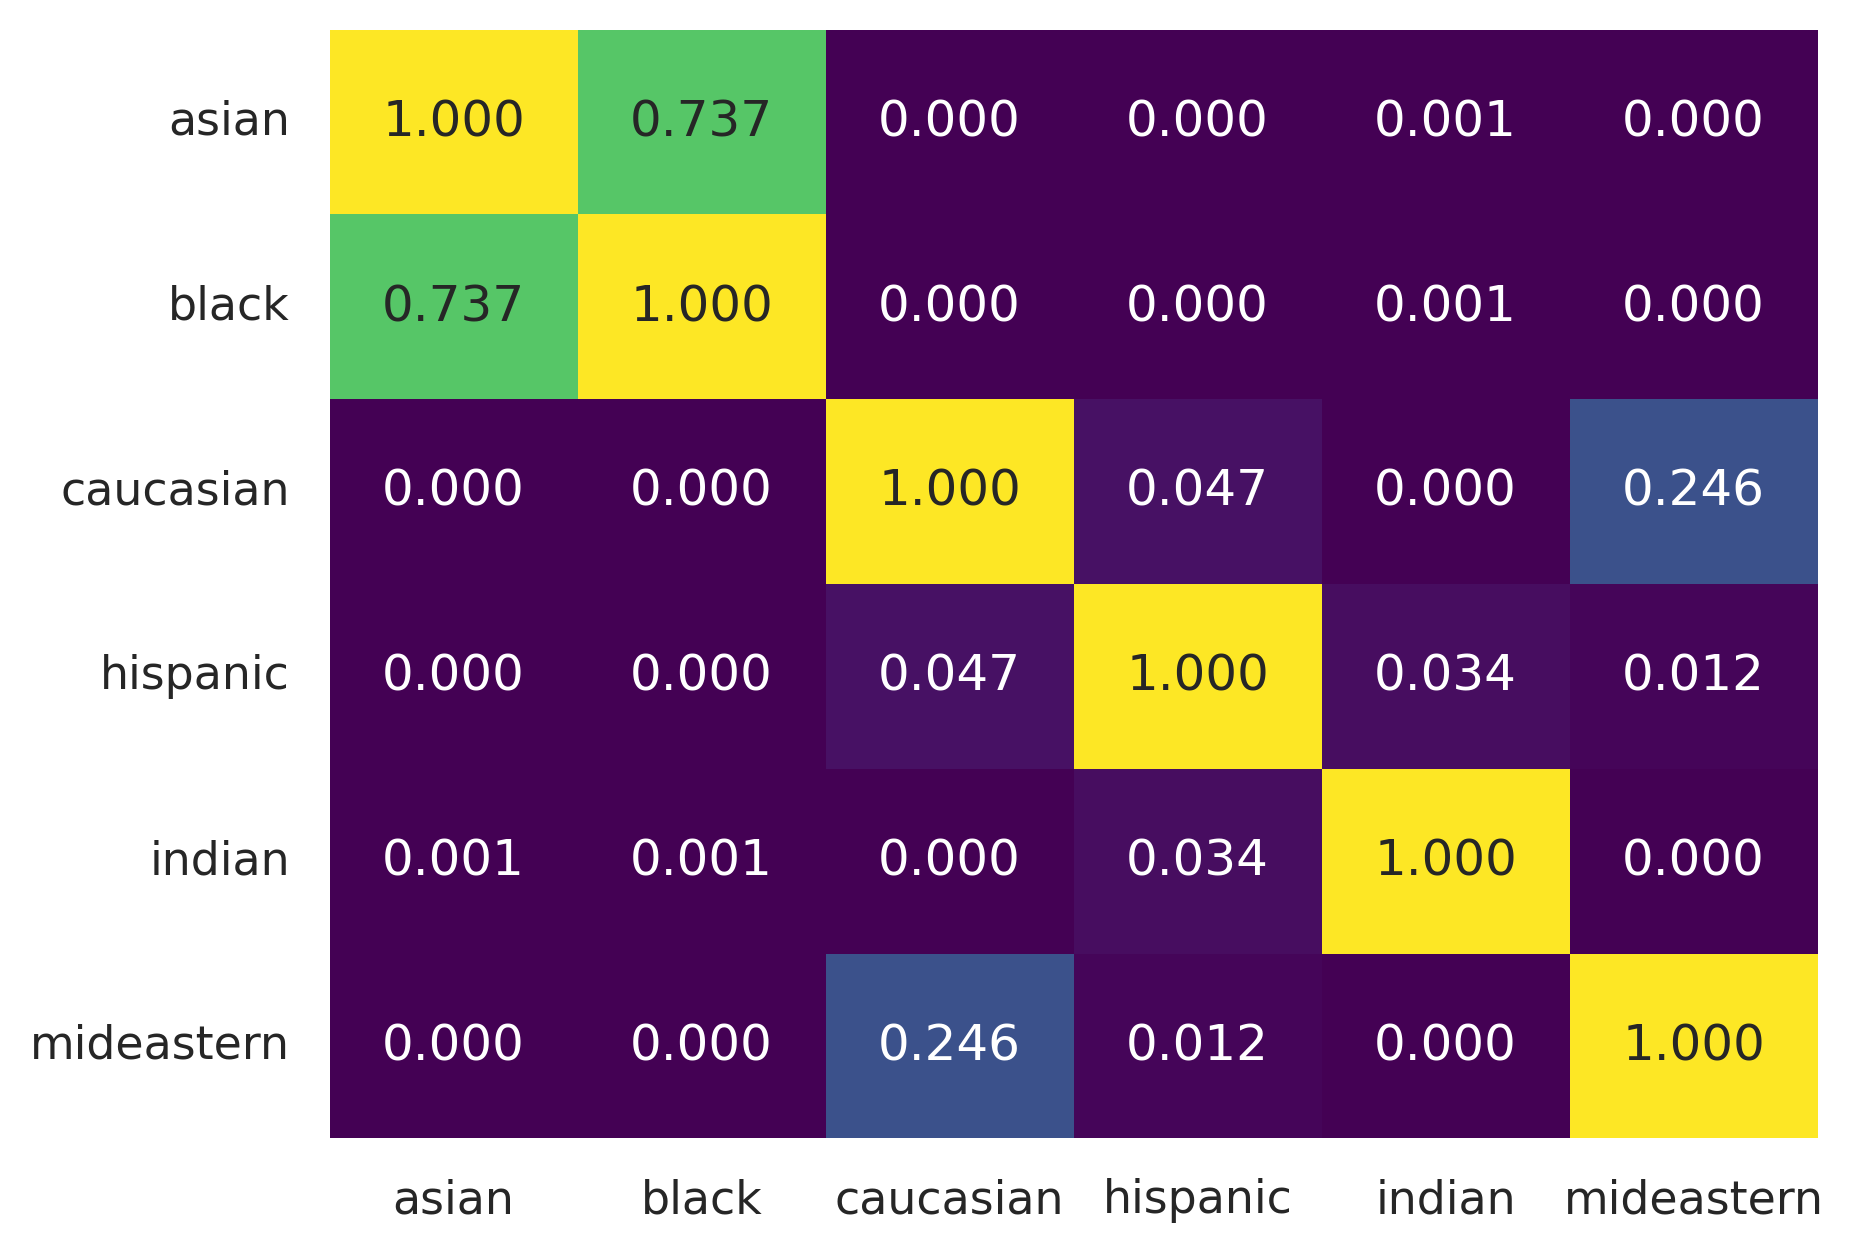

In [21]:
p_values = posthoc_dunn(df, 'predictions', 'race', p_adjust='fdr_bh')
sns.heatmap(p_values, annot=True, fmt='.3f', cmap='viridis', cbar=False)

<Axes: xlabel='predictions', ylabel='race'>

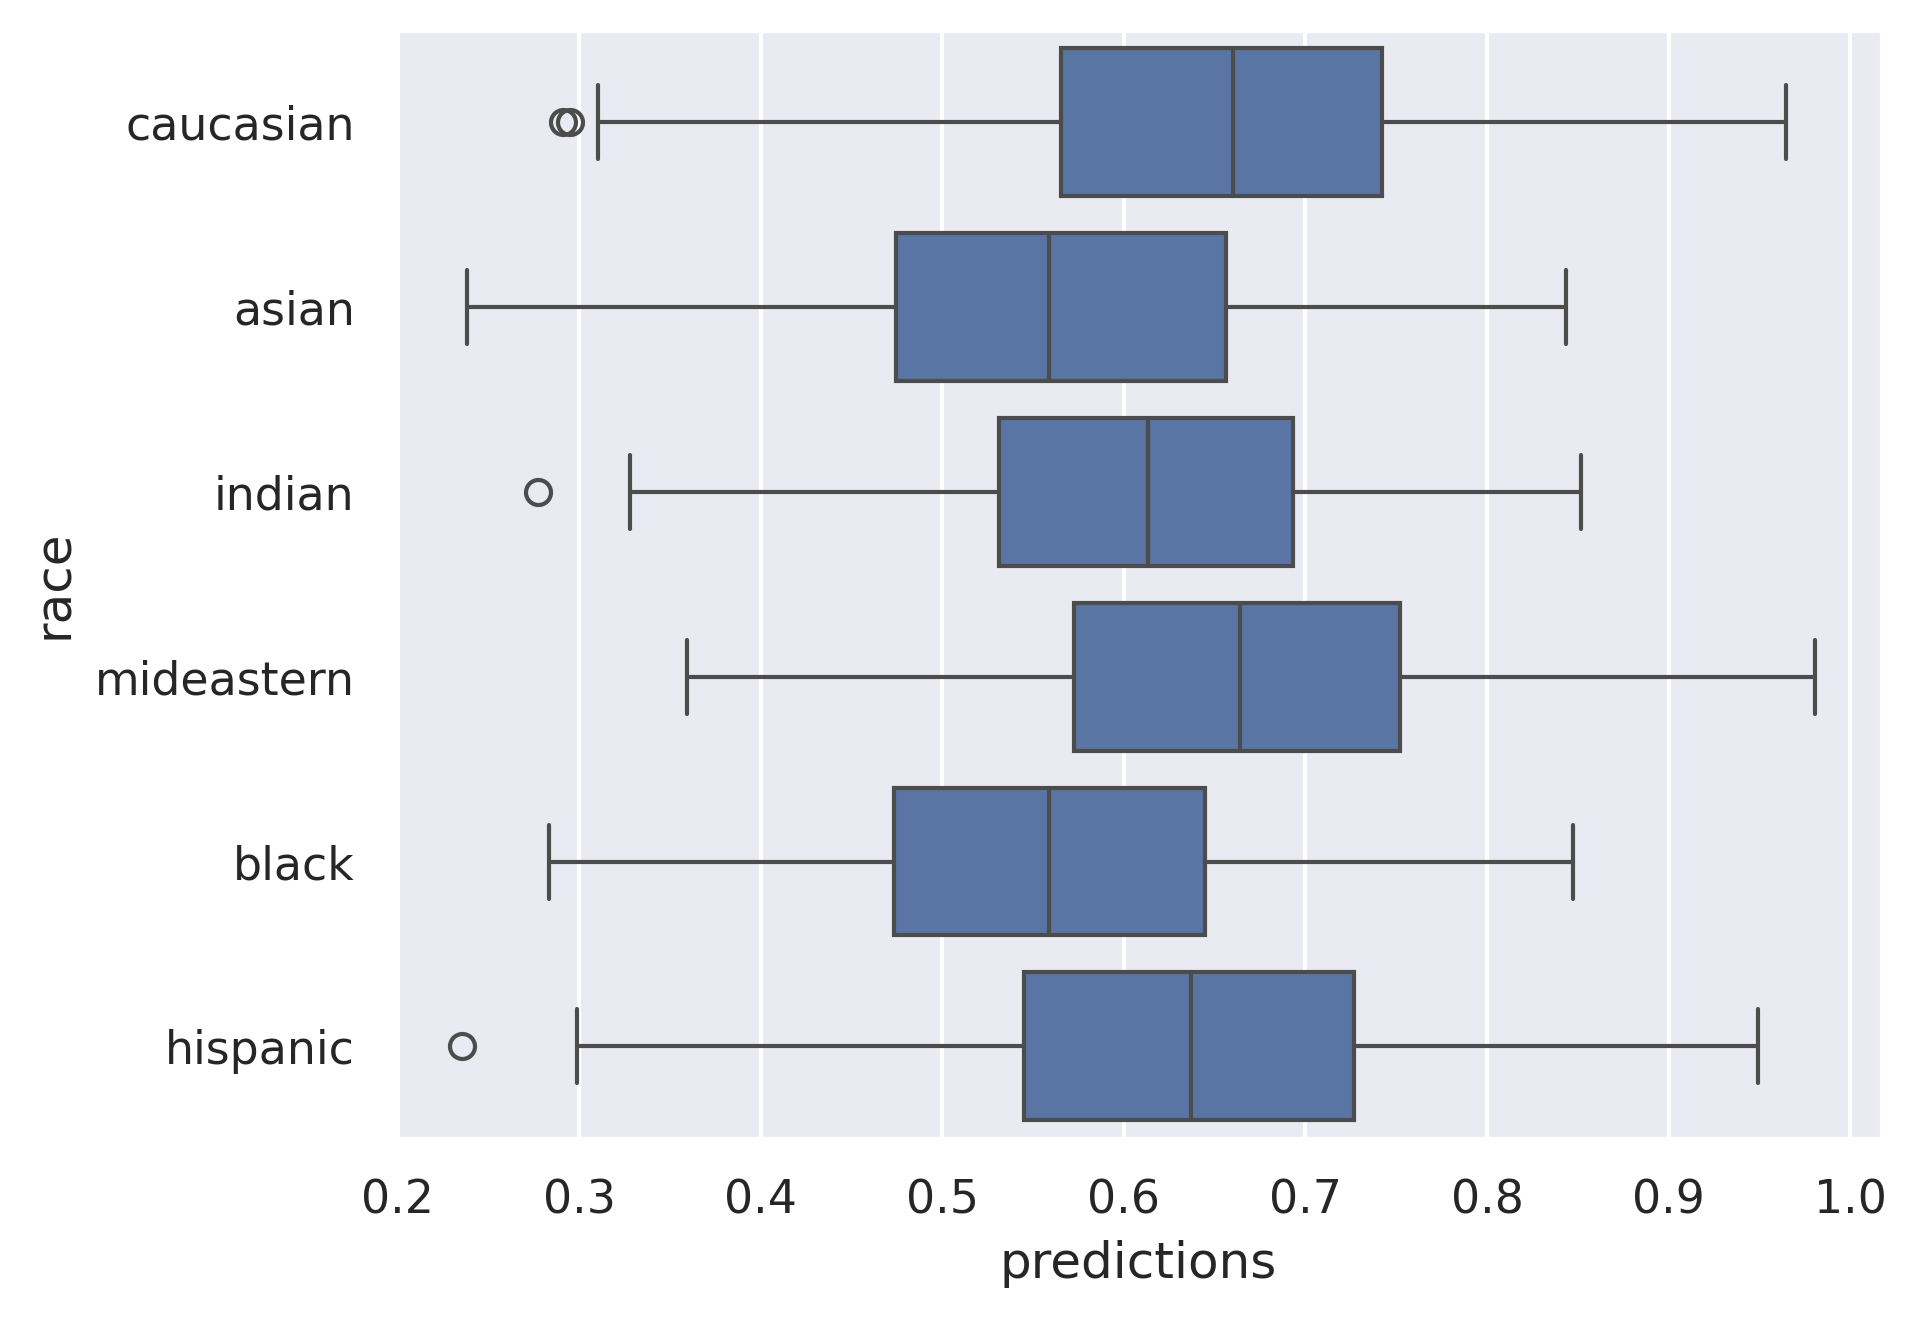

In [22]:
sns.boxplot(df, x='predictions', y='race')